<a href="https://colab.research.google.com/github/Pranav335/CS910/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [248]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Question 1

In [249]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [250]:
xtrain.shape

(60000, 28, 28)

In [251]:
ytrain.shape

(60000,)

In [252]:
type(xtrain)

numpy.ndarray

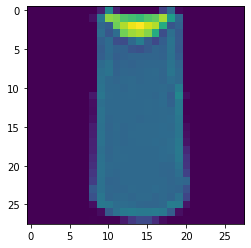

In [253]:


plt.imshow(xtrain[2,:,:])

In [254]:
def softmax(x):
  exps = np.exp(x)
  return exps/ np.sum(exps, axis = -1, keepdims = True)

x = np.array([[1, 2], [4 ,2], [3,2]])
softmax(x=x)

array([[0.26894142, 0.73105858],
       [0.88079708, 0.11920292],
       [0.73105858, 0.26894142]])

In [255]:
np.sum(np.exp(x), axis = -1, keepdims = True).shape

(3, 1)

# Question 2


Lets define the dimension of the various matrixes and vector.

W -> (N)

In [256]:
class neural_network:

  def __init__(self, x , hidden_layer = [2]):
    self.x = x
    self.n_x = x.shape[1]
    self.L = len(hidden_layer)
    self.neuron = [self.n_x] + hidden_layer + [10]
    self.W = {}
    self.B = {}
    for i in range(self.L + 1):
      self.W[i+1] = np.random.randn(self.neuron[i], self.neuron[i+1])
      self.B[i+1] = np.zeros((self.neuron[i+1]))

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def softmax(self, x):
    exps = np.exp(x)
    return exps/ np.sum(exps, axis = -1, keepdims = True)

  def forward_pass(self):
    self.A = {}
    self.H = {}
    self.H[0] = self.x
    for i in range(self.L):
      self.A[i+1] = self.H[i] @ self.W[i+1] + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])

    self.A[self.L+1] = self.H[self.L] @ self.W[self.L+1] + self.B[self.L+1]
    self.H[self.L+1] = self.softmax(self.A[self.L + 1])

    return self.H[self.L+1]





In [257]:
# Reshaping the array into a new row.
xtrain = np.reshape(xtrain, (xtrain.shape[0], -1))/255
xtest = np.reshape(xtrain, (xtest.shape[0], -1))/255
xtrain.shape

(60000, 784)

In [258]:
xtrain[1, :]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
       0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.19215686, 0.53333333, 0.85882353, 0.84705882, 0.89411765,
       0.9254902 , 1.        , 1.        , 1.        , 1.        ,
       0.85098039, 0.84313725, 0.99607843, 0.90588235, 0.62745098,
       0.17647059, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05490196, 0.69019608, 0.87058824, 0.87843137,
       0.83137255, 0.79607843, 0.77647059, 0.76862745, 0.78431373,
       0.84313725, 0.8       , 0.79215686, 0.78823529, 0.78823

# Question 3

In [299]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
class neural_network:

  def __init__(self, n_x , hidden_layer = [2]):
    #x = x.reshape(1, -1)
    #self.x = n_x # (N x 784)
    #self.n_x = x.shape[1] # 784
    self.n_x = n_x
    self.L = len(hidden_layer) # 1
    self.neuron = [self.n_x] + hidden_layer + [10] # [784, 1, 10 ]
    self.W = {}
    self.B = {}
    self.A = {}
    self.H = {}
    for i in range(self.L + 1):
      self.W[i+1] = np.random.randn(self.neuron[i+1], self.neuron[i]) #[n_y x n_x]
      self.B[i+1] = np.zeros((self.neuron[i+1], 1)) # [n_y, 1]

  def positive_sigmoid(self, x):
    ''' Calculate the sigmoid function when x > 0'''
    return 1.0/(1.0 + np.exp(-x))

  def negative_sigmoid(self, x):
    '''Calculate the sigmoid function when x < 0'''
    exp = np.exp(x)
    return exp/ (1 + exp)

  def sigmoid(self, x):
    ''' Calculate the sigmoid function'''
    positives = x >=0  # Extract the index of the positive values
    negative = ~positives

    result = np.empty_like(x)
    result[positives] = self.positive_sigmoid(x[positives]) # Find the sigmoid of the the positive 
    result[negative] = self.negative_sigmoid(x[negative])

    return result

  def softmax(self, x):
    exps = np.exp(x)
    #return exps/ np.sum(exps, axis = -1, keepdims = True)
    return exps/ np.sum(exps)

  def forward_pass(self,x):
    x = x.reshape(1, -1)
    self.H[0] = x.T # (784 x N)
    for i in range(self.L):
      self.A[i+1] = self.W[i+1] @ self.H[i]  + self.B[i+1] # (2, 784) x (784, N) + (2, 1) -> (2, N)
      self.H[i+1] = self.sigmoid(self.A[i+1]) #(2, N)

    self.A[self.L+1] = self.W[self.L+1] @ self.H[self.L] + self.B[self.L+1] #(k, k-1) x (k-1, N) + (k, 1)-> (k, N)
    self.H[self.L+1] = self.softmax(self.A[self.L + 1]) # (k, N)

    return self.H[self.L+1] 

  def grad_sigmoid(self,x):
    return x * (1 - x)

  def gradient(self, x, y):
    y = y.reshape(-1, 1)
    self.dW = {}
    self.dB = {}
    self.dA = {}
    self.dH = {}
    # y = (N, k)
    self.forward_pass(x)
    self.dA[self.L + 1] = self.H[self.L+1] - y # (k, N)
    for k in range(self.L+1, 0, -1):
      self.dW[k] = self.dA[k] @ self.H[k-1].reshape(1, -1) # (2, N) x (N, 2) -> (2, 2)
      #self.dB[k] = np.sum(self.dA[k], axis = 1).reshape(-1, 1) # (2, N) -> (2, 1)
      self.dB[k] = self.dA[k]
      if k > 1:
        self.dH[k-1] = self.W[k].T @ self.dA[k] 
        self.dA[k-1] = self.dH[k-1] * self.grad_sigmoid(self.H[k-1])
        

  def cross_entropy(self, ytrue, ypred):
    ytrue = ytrue.reshape(-1, 1)
    ypred = ypred.reshape(-1, 1)
    loss = 0
    eps = 0.001
    for y1, y2 in zip(ytrue, ypred):
      loss -= y1 * np.log(y2 + eps)
    
    return loss


  def fit_neural_network(self,X, Y, epochs = 1000, lr = 0.1):
    loss = []
    dW = {}
    dB = {}
    for i in range(self.L + 1):
      dW[i+1] = np.random.randn(self.neuron[i+1], self.neuron[i]) #[n_y x n_x]
      dB[i+1] = np.zeros((self.neuron[i+1], 1)) # [n_y, 1]
    n_samples = X.shape[0]
    print(n_samples)
    for i in range(epochs):
      epoch_loss = 0
      for j in range(n_samples):
        self.gradient(X[j,:], Y[j,:]) # Y -> (N, k)
        for k in range(self.L + 1):
          dW[k+1] += self.dW[k+1]
          dB[k+1] += self.dB[k+1]
      for k in range(self.L + 1):
        self.W[k+1] -= lr * dW[k+1]
        self.B[k+1] -= lr * dB[k+1]

      for j in range(n_samples):
        yhat = self.forward_pass(X[j,:])
        epoch_loss += self.cross_entropy(Y[j,:], yhat)
      #yhat = self.forward_pass()
      #epoch_loss = self.cross_entropy(Y, yhat)
      loss.append(epoch_loss)

    
    plt.plot([*range(epochs)], loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')




In [284]:
ytrain.shape
x = np.array([1,2,-3,4])
x>=0

array([ True,  True, False,  True])

In [285]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
ytrain_oh = encoder.fit_transform(ytrain.reshape(-1,1))
ytest_oh = encoder.fit_transform(ytest.reshape(-1,1))

In [286]:
ytrain_oh = ytrain_oh.toarray()
ytest_oh = ytest_oh.toarray()

In [287]:
ytrain_oh.shape

(60000, 10)

In [300]:
nn = neural_network(784)
yhat = nn.forward_pass(xtrain[0,:])
yhat.shape


(10, 1)

In [289]:
nn.W[1]

array([[ 1.40790274,  1.16420623,  0.33438714, ...,  1.13362684,
        -0.32268355, -0.22167457],
       [ 1.14509321, -0.49032579,  0.09728161, ..., -1.08835109,
        -0.39537016, -2.15809368]])

In [290]:
nn.W[2]

array([[ 0.33987347,  0.25011833],
       [ 2.31243977,  0.56476993],
       [-0.47069332, -0.04782913],
       [-0.20487599,  2.42290243],
       [-0.24751626,  0.07151252],
       [ 0.54469797, -0.85838237],
       [ 0.4093458 ,  1.75667235],
       [ 1.0505058 , -0.66544314],
       [ 0.72212223, -0.13029351],
       [-0.30164378,  0.86135762]])

In [291]:
nn.H[0].T.shape

(1, 784)

100


<ipython-input-299-6062a224df65>:41: RuntimeWarning: overflow encountered in exp
  exps = np.exp(x)
<ipython-input-299-6062a224df65>:43: RuntimeWarning: invalid value encountered in true_divide
  return exps/ np.sum(exps)


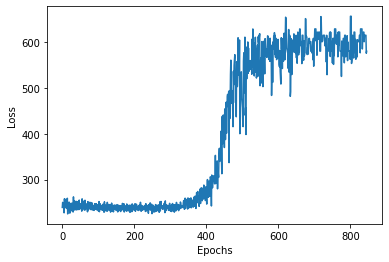

In [301]:
nn.fit_neural_network(xtrain[:100, :],ytrain_oh[:100, :], epochs = 1000)

In [ ]:
nn.A[1]

In [ ]:
nn.dA[1]

In [ ]:
nn.W.keys(), nn.A.keys(), nn.H.keys()
nn.dW.keys(), nn.dA.keys(), nn.H.keys()

In [ ]:
ytrain_oh[0, :]

In [ ]:
nn.dA[2].shape

In [ ]:
nn.H[2].shape 

In [ ]:
(nn.H[2] - ytrain_oh[0, :]).shape

In [ ]:
 nn.H[2] - ytrain_oh[0, :].reshape(-1, 1)

In [ ]:
 nn.A[1]

In [ ]:
nn.A[2]